# CITATION
If you use any part of this notebook in your work, please cite it as follows:

**Hannah Igboke (2024). Predicting global sales. Link: https://www.kaggle.com/code/hannahigboke/game-sales-predicting-global-sales**

# Global sales prediction model

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/MyDrive/MidProject/Video_Games.csv'
df = pd.read_csv(file_path)

In [4]:
games = pd.read_csv(file_path)
games.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
games2 = games.copy()
print(games2.columns)
games2.drop(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Name', 'Year_of_Release'], axis=1, inplace=True)

games2.head()

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')


,Platform,Genre,Publisher,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii,Sports,Nintendo,82.53,76.0,51.0,8,322.0,Nintendo,E
1,NES,Platform,Nintendo,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Wii,Racing,Nintendo,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii,Sports,Nintendo,32.77,80.0,73.0,8,192.0,Nintendo,E
4,GB,Role-Playing,Nintendo,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
games2.dtypes

,0
Platform,object
Genre,object
Publisher,object
Global_Sales,float64
Critic_Score,float64
Critic_Count,float64
User_Score,object
User_Count,float64
Developer,object
Rating,object


In [7]:
games2.describe(include='object')

,Platform,Genre,Publisher,User_Score,Developer,Rating
count,16719,16717,16665,10015,10096,9950
unique,31,12,581,96,1696,8
top,PS2,Action,Electronic Arts,tbd,Ubisoft,E
freq,2161,3370,1356,2425,204,3991


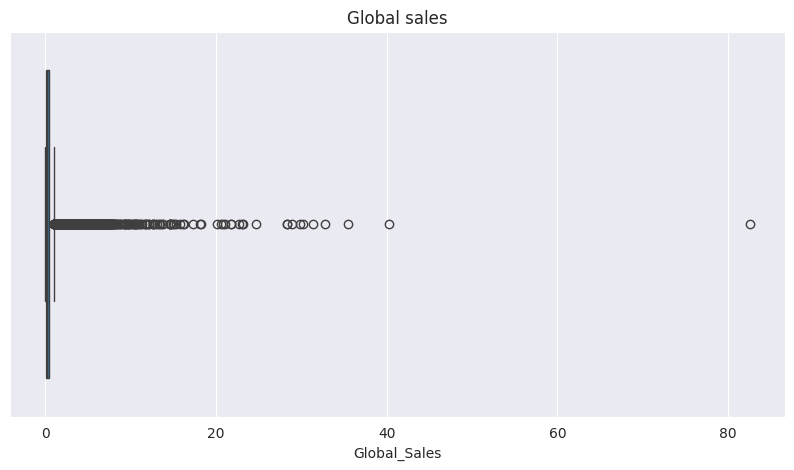

In [8]:
plt.subplots(figsize=(10,5))

sns.boxplot(data=games2, x='Global_Sales')
plt.title('Global sales')
plt.show()

We observe that there is a case of extreme outliers in the global sales column, with the maximum value far away from the rest of the values in the distribution.

In [9]:
games2.describe(include='float64')

,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16719.000000,8137.000000,8137.000000,7590.000000
mean,0.533543,68.967679,26.360821,162.229908
std,1.547935,13.938165,18.980495,561.282326
min,0.010000,13.000000,3.000000,4.000000
25%,0.060000,60.000000,12.000000,10.000000
50%,0.170000,71.000000,21.000000,24.000000
75%,0.470000,79.000000,36.000000,81.000000
max,82.530000,98.000000,113.000000,10665.000000


In [10]:
games2 = games2[games2['Global_Sales']<=60]
games2['Global_Sales'].describe()

#this is used to filter out the extreme outlier case

,Global_Sales
count,16718.000000
mean,0.528638
std,1.412102
min,0.010000
25%,0.060000
50%,0.170000
75%,0.470000
max,40.240000


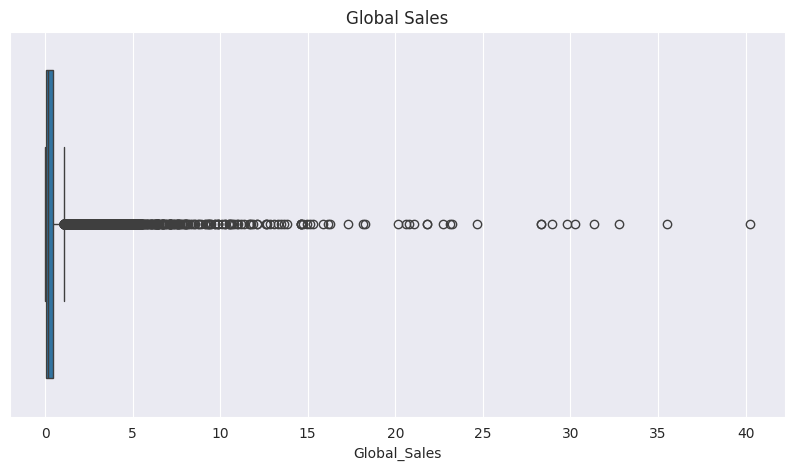

In [11]:
plt.subplots(figsize=(10,5))

sns.boxplot(data=games2, x='Global_Sales')
plt.title('Global Sales')
plt.show()

In [12]:
games2.head()

,Platform,Genre,Publisher,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1,NES,Platform,Nintendo,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Wii,Racing,Nintendo,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii,Sports,Nintendo,32.77,80.0,73.0,8,192.0,Nintendo,E
4,GB,Role-Playing,Nintendo,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,GB,Puzzle,Nintendo,30.26,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Check if 'Release_Era' is in the original DataFrame
print(games.columns)

# If 'Release_Era' is not in the original DataFrame,
# you may need to create it based on 'Year_of_Release'
# or review the original data source.

# If 'Release_Era' was accidentally removed,
# retrace your steps and make sure it's retained.

# Assuming 'Release_Era' should be derived from 'Year_of_Release':

# Since 'Year_of_Release' was dropped from games2,
# we need to access it from the original 'games' DataFrame
def assign_release_era(year):
    if year < 1990:
        return 'Early Era'
    elif year < 2000:
        return '90s Era'
    elif year < 2010:
        return '2000s Era'
    else:
        return 'Modern Era'

# Apply the function to the 'Year_of_Release' column in 'games'
# and assign the result to the 'Release_era' column in 'games2'
games2['Release_era'] = games['Year_of_Release'].apply(assign_release_era)


# Now try creating the dummy variables again:
games2df = pd.get_dummies(games2, columns=['Platform', 'Release_era', 'Genre', 'Publisher', 'Developer', 'Rating']) # Use 'Release_era' here
games2df.dtypes

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')


,0
Global_Sales,float64
Critic_Score,float64
Critic_Count,float64
User_Score,object
User_Count,float64
...,...
Rating_EC,bool
Rating_K-A,bool
Rating_M,bool
Rating_RP,bool


In [14]:
def change_datatype(data):
    for col_name in data.columns:
        if data[col_name].dtype == 'bool':
            data[col_name]=data[col_name].astype(int)
    return data

games2df = change_datatype(games2df)
games2df.dtypes

,0
Global_Sales,float64
Critic_Score,float64
Critic_Count,float64
User_Score,object
User_Count,float64
...,...
Rating_EC,int64
Rating_K-A,int64
Rating_M,int64
Rating_RP,int64


In [15]:
games2df.head()

,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Platform_2600,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,...,Developer_syn Sophia,Developer_zSlide,Rating_AO,Rating_E,Rating_E10+,Rating_EC,Rating_K-A,Rating_M,Rating_RP,Rating_T
1,40.24,NaN,NaN,NaN,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,35.52,82.0,73.0,8.3,709.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,32.77,80.0,73.0,8,192.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,31.37,NaN,NaN,NaN,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,30.26,NaN,NaN,NaN,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
#importing all libraries needed

import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import BayesianRidge, LinearRegression, Lasso
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV

In [17]:
#splitting the data

y = games2df['Global_Sales']
X = games2df.drop(columns=['Global_Sales'])

#splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
# Replace 'tbd' with NaN in X_train and X_test
X_train = X_train.replace('tbd', np.nan)
X_test = X_test.replace('tbd', np.nan)

# Impute NaN values using the mean of the column
# This is just one imputation strategy, you can explore others
# like median, KNN imputation etc.
for column in X_train.columns:
    if X_train[column].isnull().any():  # Check if column has NaN values
        X_train[column] = X_train[column].fillna(X_train[column].astype(float).mean())
        X_test[column] = X_test[column].fillna(X_train[column].astype(float).mean()) # Use training mean for test set as well

# Now proceed with scaling:
x_scaler = StandardScaler()
y_scaler = StandardScaler()

X_train_scaled = x_scaler.fit_transform(X_train)
# ... rest of your code ...

In [19]:
##define models

dt_model = tree.DecisionTreeRegressor(max_depth=200)
svr_model = svm.SVR(kernel='rbf')
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
bayes_model = BayesianRidge(compute_score=True)
lass_model = Lasso(alpha=0.1)
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
linear_model = LinearRegression()

In [20]:
# ... previous code ...

# Now proceed with scaling:
x_scaler = StandardScaler()
y_scaler = StandardScaler()

X_train_scaled = x_scaler.fit_transform(X_train)
# Scale y_train as well
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).ravel()  # Reshape for scaling and then flatten

# Scale X_test using the same scaler used for X_train
X_test_scaled = x_scaler.transform(X_test)  # This line is added

# ... rest of your code ...

#Decision tree
dt = dt_model.fit(X_train_scaled, y_train_scaled) # Now y_train_scaled is defined
y_pred_tree = dt_model.predict(X_test_scaled)  # X_test_scaled is now defined

# ... rest of your code ...

In [21]:
#Support Vector Regression
# Make sure this cell is run after the cell defining svr_model
# (the one containing: svr_model = svm.SVR(kernel='rbf'))

from sklearn import svm  # If not already imported
svr_model = svm.SVR(kernel='rbf')  # Define svr_model in this cell if it wasn't previously

svr_model.fit(X_train_scaled, y_train_scaled)
y_pred_svr = svr_model.predict(X_test_scaled)

#R2 score and mean squared error
from sklearn.metrics import r2_score, mean_squared_error # if not already imported
import math # if not already imported

# Scale y_test using the same scaler used for y_train
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1)).ravel()  # Reshape for scaling and then flatten

r2_score_svr = r2_score(y_test_scaled, y_pred_svr) # Now using y_test_scaled
rsme_svr = math.sqrt(mean_squared_error(y_test_scaled, y_pred_svr))
rsme_svr, r2_score_svr

(0.9391648085076153, 0.173851880818515)

In [22]:
#Random Forest Regressor
rf_model.fit(X_train_scaled, y_train_scaled)
y_pred_rf = rf_model.predict(X_test_scaled)

#R2 score and mean squared error
r2_score_rf = r2_score(y_test_scaled, y_pred_rf)
rsme_rf = math.sqrt(mean_squared_error(y_test_scaled, y_pred_rf))
rsme_rf, r2_score_rf

(0.8244559685447433, 0.3633375594114443)

In [23]:
#Bayes Ridge regression
bayes_model.fit(X_train_scaled, y_train_scaled)
y_pred_bayes = bayes_model.predict(X_test_scaled)

#R2 score and mean squared error
r2_score_bayes = r2_score(y_test_scaled, y_pred_bayes)
rsme_bayes = math.sqrt(mean_squared_error(y_test_scaled, y_pred_bayes))
rsme_bayes, r2_score_bayes

(0.8891412839040578, 0.25951571164631915)

In [24]:
#Lasso regression
lass_model.fit(X_train_scaled, y_train_scaled)
y_pred_lass = lass_model.predict(X_test_scaled)

#R2 score and mean squared error
r2_score_lass = r2_score(y_test_scaled, y_pred_lass)
rsme_lass = math.sqrt(mean_squared_error(y_test_scaled, y_pred_lass))
rsme_lass, r2_score_lass

(0.9575295193061232, 0.14122648900470602)

In [25]:
#XGB regression
xgb_model.fit(X_train_scaled, y_train_scaled)
y_pred_xgb = xgb_model.predict(X_test_scaled)

#R2 score and mean squared error
r2_score_xgb = r2_score(y_test_scaled, y_pred_xgb)
rsme_xgb = math.sqrt(mean_squared_error(y_test_scaled, y_pred_xgb))
rsme_xgb, r2_score_xgb

(0.82453003979218, 0.36322315548598316)

In [26]:
#linear regression
linear_model.fit(X_train_scaled, y_train_scaled)
y_pred_lin = linear_model.predict(X_test_scaled)

#R2 score and the mean squared error
r2_score_lin = r2_score(y_test_scaled, y_pred_lin)
rsme_lin = math.sqrt(mean_squared_error(y_test_scaled, y_pred_lin))
rsme_lin, r2_score_lin

(0.8948853852797996, 0.24991733616238732)

In [28]:
#Decision tree
dt = dt_model.fit(X_train_scaled, y_train_scaled)
y_pred_tree = dt_model.predict(X_test_scaled)

#R2 score and mean squared error
r2_score_tree = r2_score(y_test_scaled, y_pred_tree)
rsme_tree = math.sqrt(mean_squared_error(y_test_scaled, y_pred_tree))
rsme_tree, r2_score_tree

# ... (rest of your code remains the same) ...

model_results = pd.DataFrame({
                    'Algorithms': ['DT', 'SVR', 'RF', 'Bayes', 'Lasso', 'XGB', 'Linear'],
                    'RSME': [rsme_tree, rsme_svr, rsme_rf, rsme_bayes,rsme_lass,rsme_xgb, rsme_lin],
                    'R2': [r2_score_tree, r2_score_svr, r2_score_rf, r2_score_bayes, r2_score_lass,r2_score_xgb, r2_score_lin]
})
round(model_results,3)

,Algorithms,RSME,R2
0,DT,1.003,0.057
1,SVR,0.939,0.174
2,RF,0.824,0.363
3,Bayes,0.889,0.260
4,Lasso,0.958,0.141
5,XGB,0.825,0.363
6,Linear,0.895,0.250
